## Prepare python environment


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

%matplotlib inline

In [2]:
random_state = 5 # use this to control randomness across runs e.g., dataset partitioning

## Preparing the Credit Card Fraud Detection dataset (2 points)

The dataset contains transactions made by credit cards in September 2013 by European cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.
See [here](https://www.kaggle.com/mlg-ulb/creditcardfraud) for details of the dataset. We will post process the data to balance both the classes.

### Loading the dataset

In [3]:
# Download and load the dataset
import os
if not os.path.exists('creditcard.csv'): 
    !wget https://raw.githubusercontent.com/JHA-Lab/ece364_2022/master/dataset/creditcard.zip
    !unzip creditcard.zip

df = pd.read_csv("creditcard.csv")
print(df.head())

--2022-12-11 04:17:47--  https://raw.githubusercontent.com/JHA-Lab/ece364_2022/master/dataset/creditcard.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 69155709 (66M) [application/zip]
Saving to: ‘creditcard.zip’

creditcard.zip      100%[===================>]  65.95M   153MB/s    in 0.4s    

2022-12-11 04:17:48 (153 MB/s) - ‘creditcard.zip’ saved [69155709/69155709]

Archive:  creditcard.zip
  inflating: creditcard.csv          
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   

In [ ]:
# Check the datatype of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

There are a total of 284,807 entries in this dataset with no missing values. The first 30 columns are features and the last column indicates whether the transaction is fraud or not.

#### Use the `describe` function to display some statistics of the data. See [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html) for details about this function.

In [ ]:
# Look at some statistics of the data using the 'describe' function
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


1. Count tells us the number of non-empty rows in a feature.

2. Mean tells us the mean value of that feature.

3. Std tells us the standard deviation of that feature.

4. Min tells us the minimum value of that feature.

5. 25%, 50%, and 75% are the percentile/quartiles of each feature.

6. Max tells us the maximum value of that feature.

#### Visualize the distribution of fraudulent vs genuine transactions

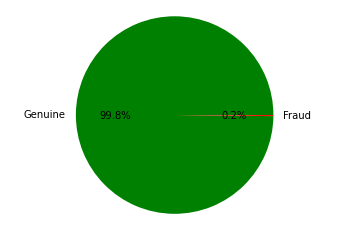

In [ ]:
# Make a pie chart showing transaction type
fig, ax = plt.subplots(1, 1)
ax.pie(df.Class.value_counts(),autopct='%1.1f%%', labels=['Genuine','Fraud'], colors=['green','red'])
plt.axis('equal');
plt.ylabel('');

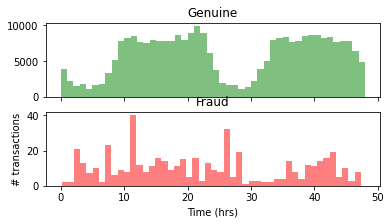

In [4]:
# Check fradulent activity over time (note: total time is 48 hours)
df["Time_Hr"] = df["Time"]/3600 # convert to hours
fig, (ax1, ax2) = plt.subplots(2, 1, sharex = True, figsize=(6,3))
ax1.hist(df.Time_Hr[df.Class==0],bins=48,color='g',alpha=0.5)
ax1.set_title('Genuine')
ax2.hist(df.Time_Hr[df.Class==1],bins=48,color='r',alpha=0.5)
ax2.set_title('Fraud')
plt.xlabel('Time (hrs)')
plt.ylabel('# transactions');

In [5]:
# Remove the 'Time' feature as it is already captured when converting to hours
df = df.drop(['Time'],axis=1)

#### Create a balanced dataset with 50% from each class

In [6]:
fraud_indices = np.array(df[df.Class == 1].index) # indices corresponding to fraud transaction
genuine_ind = df[df.Class == 0].index # indices corresponding to genuine transaction
total_fraud_transactions = len(df[df.Class == 1]) # total transactions that were fraud
np.random.seed(0) # fix the random seed generator for consistent results
indices_genuine_transaction = np.random.choice(genuine_ind, total_fraud_transactions, replace = False)
indices_genuine_transaction = np.array(indices_genuine_transaction)
selected_balanced_indices = np.concatenate([fraud_indices,indices_genuine_transaction]) # indices for balanced data
balanced_data = df.iloc[selected_balanced_indices,:]

% genuine transactions:  0.5
% fraud transactions:  0.5


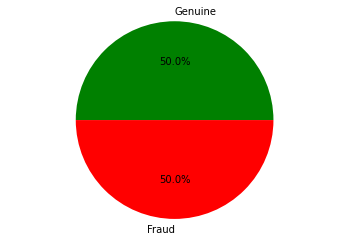

In [7]:
print("% genuine transactions: ",len(balanced_data[balanced_data.Class == 0])/len(balanced_data))
print("% fraud transactions: ",len(balanced_data[balanced_data.Class == 1])/len(balanced_data))

# Make a pie chart showing transaction type
fig, ax = plt.subplots(1, 1)
ax.pie(balanced_data.Class.value_counts(),autopct='%1.1f%%', labels=['Genuine','Fraud'], colors=['green','red'])
plt.axis('equal')
plt.ylabel('');

### Extract target and descriptive features (0.5 points)

In [8]:
# Store all the features from the data in X
X = balanced_data.drop('Class',axis=1)
# Store all the labels in y
y = balanced_data['Class']
#print(X)
#print(y)

In [9]:
# Convert data to numpy array
X = X.to_numpy()
y = y.to_numpy()

### Create training and validation datasets (0.5 points)

Split the data into training and validation sets using `train_test_split`.  See [here](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) for details. To get consistent result while splitting, set `random_state` to the value defined earlier. We use 80% of the data for training and 20% of the data for validation. This has been done for you.

In [10]:
X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=.2,random_state=random_state) # 80% training and 20% validation

### Preprocess the dataset (1 point)

#### Preprocess the data by normalizing each feature to have zero mean and unit standard deviation. This can be done using the `StandardScaler()` function. See [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) for more details.


In [12]:
print(X_train.shape)
print(y_train.shape)
# Define the scaler for scaling the data
scaler = StandardScaler()

# Normalize the training data
X_train = scaler.fit_transform(X_train)

# Use the scaler defined above to standardize the validation data by applying the same transformation to the validation data.
X_val = scaler.transform(X_val)
#print(X_train[0,:])
#print(X_val[0,:])

(787, 30)
(787,)


## Training a Multi-Layer Perceptron (18 points)


#### We will use `sklearn's` neural network library to train a multi-layer perceptron for classification. The model is trained to optimize the cross-entropy loss using stochastic gradient descent. Review ch.8 and see [here](https://scikit-learn.org/stable/modules/neural_networks_supervised.html) for more details. 


#### NOTE: Training each network takes several seconds to minutes.

In [13]:
from sklearn.neural_network import MLPClassifier 
from sklearn.metrics import accuracy_score 
import matplotlib.pyplot as plt

In [14]:
"""
For info on the arguments and attributes, see here: 
(https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier)
"""

def get_mlp(hidden_layer_sizes=(100,),
            activation='relu',
            learning_rate_init=0.1,
            early_stopping=False, 
            validation_fraction=0.15):
  
  # use stochastic gradient descent
  parameters={'solver':'sgd',
              'alpha': 0,
              'momentum': 0,
              'max_iter':20000,
              'n_iter_no_change':100,
              'tol': 1e-5,
              'random_state': random_state
              }

  parameters['hidden_layer_sizes']=hidden_layer_sizes
  parameters['activation']=activation
  parameters['learning_rate_init']=learning_rate_init
  parameters['early_stopping']=early_stopping
  parameters['validation_fraction']=validation_fraction 

  return MLPClassifier(**parameters)

### Exercise 1: Warm up (2 points)

#### Use `get_mlp` defined above to create a multi-layer perceptron with 1 hidden layer consisting of 100 units and train the classifier on the training dataset. Keep all other parameters at their default values.
 

In [ ]:
clf = get_mlp()
print(X_train.shape)
print(y_train.shape)
clf.fit(X_train, y_train)# clf = clf.fit(X_train, y_train)

(787, 30)
(787,)


MLPClassifier(alpha=0, learning_rate_init=0.1, max_iter=20000, momentum=0,
              n_iter_no_change=100, random_state=5, solver='sgd', tol=1e-05,
              validation_fraction=0.15)

#### Visualize the evolution of the training loss. Hint: use `loss_curve_` attribute of the classifier.





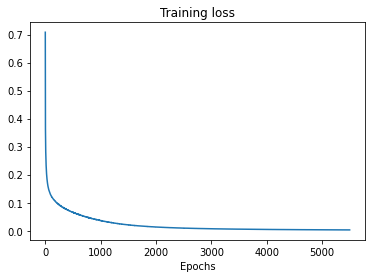

In [ ]:
plt.figure()
plt.plot(np.arange(len(clf.loss_curve_)), clf.loss_curve_)
plt.xlabel('Epochs')
plt.title('Training loss')
plt.show()

#### Report the classifier's accuracies over the training and validation datasets. Hint: use `accuracy_score`

In [ ]:
training_acc=accuracy_score(y_train,clf.predict(X_train))
val_acc=accuracy_score(y_val,clf.predict(X_val))
print("Training acc: %.5f" %training_acc)
# print("Validation acc: %.2f" %val_acc)
print("Validation acc: %.5f" %val_acc)

Training acc: 1.00000
Validation acc: 0.90355


#### Explain any performance difference observed between the training and validation datasets.

The classifier has overfit to the training dataset, resulting in lower accuracy on the validation dataset.

#### We will next explore several strategies to improve the model's validation performance. 

### Exercise 2: Width vs Depth (12 points)

#### Exercise 2a (4 points)

#### Next, we will experiment with the width of the hidden layer, defined by the number of units in the hidden layer. 

#### Do this by using `get_mlp` to create a multi-layer perceptron with 1 hidden layer. Vary the number of hidden units among 1, 3, 7, 15, 25, by setting `hidden_layer_sizes`. Keep all other parameters at their default values.

#### Fit each classifier on the training dataset and report its training and validation accuracies.
 

  

In [ ]:
options_hidden_layer_sizes=[(1,), (3,), (7,), (15,), (25,)]

for hidden_layer_sizes in options_hidden_layer_sizes:
  clf = get_mlp(hidden_layer_sizes=hidden_layer_sizes)

  clf = clf.fit(X_train,y_train)

  training_acc=accuracy_score(y_train,clf.predict(X_train))
  val_acc=accuracy_score(y_val,clf.predict(X_val))

  print("MLP with %d hidden units"%hidden_layer_sizes[0])
  print("Training acc: %.5f, Validation acc: %.5f" %(training_acc, val_acc))


MLP with 1 hidden units
Training acc: 0.94917, Validation acc: 0.92386
MLP with 3 hidden units
Training acc: 0.96823, Validation acc: 0.89848
MLP with 7 hidden units
Training acc: 1.00000, Validation acc: 0.87817
MLP with 15 hidden units
Training acc: 1.00000, Validation acc: 0.88832
MLP with 25 hidden units
Training acc: 1.00000, Validation acc: 0.90863


#### Provide a possible explanation for any effect observed upon increasing the number of hidden units on classifier performance.

Increasing the number of hidden units improves the training accuracy until 100%, but it causes validation performance to drop due to overfitting. This indicates that with the current parameter (learning rate, number of iterations, etc) settings, the classifier has overfit to the training dataset even with 1 hidden unit. This is possibly due to the various types of input features, which increases the number of weights.

#### Exercise 2b (4 points)

#### Next, we will experiment with the depth of the MLP, by varying the number of hidden layers. 

#### Do this by using `get_mlp` to create a Multi-layer perceptron with 25 units per hidden layer. Vary the number of hidden layers from 1 through 4, by setting `hidden_layer_sizes`. Keep all other parameters at their default values.

#### Fit each classifier on the training dataset and report its training and validation accuracies.


In [ ]:
for num_hidden_layers in np.arange(1,5):
  clf = get_mlp(hidden_layer_sizes=tuple([25]*num_hidden_layers,))

  clf = clf.fit(X_train,y_train)

  training_acc=accuracy_score(y_train,clf.predict(X_train))
  val_acc=accuracy_score(y_val,clf.predct(X_val))

  print("#Hidden layers: %d : Training acc: %.5f, Validation acc: %.5f" %(num_hidden_layers, training_acc, val_acc))

#Hidden layers: 1 : Training acc: 1.00000, Validation acc: 0.90863
#Hidden layers: 2 : Training acc: 1.00000, Validation acc: 0.90355
#Hidden layers: 3 : Training acc: 1.00000, Validation acc: 0.89340
#Hidden layers: 4 : Training acc: 1.00000, Validation acc: 0.88832


#### Provide a possible explanation for any change in performance upon increasing the model depth. 

As measured on the validation dataset, the model with 1 hidden layer performs the best among the models. In general, increasing depth facilitates more overfitting due to the increased representation capacity and larger search space, thereby reducing validation accuracy.
 

#### Exercise 2c (4 points)

#### Next, we'll explore the role of the hidden activation function when training a deeper network.

#### Do this by using `get_mlp` to create a multi-layer perceptron with 5 hidden layers, each with 15 hidden units. Vary the activation functions among identity, logistic, tanh, and relu. Keep all other parameters at their default values.

#### Fit each classifier on the training dataset and report its training accuracy.

#### Also, plot the training loss curves for each classifier on a single plot. 


Activation type: identity : Training acc: 0.94663
Activation type: logistic : Training acc: 0.50826
Activation type: tanh : Training acc: 1.00000
Activation type: relu : Training acc: 1.00000


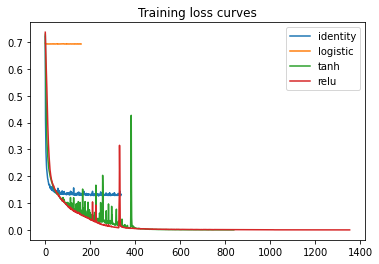

In [23]:
plt.figure()

for activation in ['identity', 'logistic', 'tanh', 'relu']:
  clf = get_mlp(hidden_layer_sizes=(15,15,15,15,15,), activation=activation)
  clf=clf.fit(X_train,y_train)

  plt.plot(np.arange(len(clf.loss_curve_)), clf.loss_curve_, label=activation)

  training_acc=accuracy_score(y_train,clf.predict(X_train))

  print("Activation type: %s : Training acc: %.5f" %(activation, training_acc))

plt.title('Training loss curves')
#plt.axis([0,100,0,1])
plt.legend()

#### Explain any effect observed on the traininig loss trajectories and accuracies when varying the hidden activation function.

A model trained with the identity function has a high loss on the traininig dataset and corresponding low training accuracy. The model lacks sufficient representational capacity to model potentially nonlinear relationships in the training dataset.

However, training a model with the logistic loss precludes learning even more, incurring higher training loss and lower training accuracy. This most likely occurs because of vanishing gradients. Activations most likely saturated, resulting in diminished gradients from the logistic loss function. This is further exacerbated at earlier layers, due to chain rule.

Training with relu alleviates vanishing gradients, facilitating learning on the training set, as observed by the decreased training loss and increased training accuracy. In this case, training with the hyperbolic tangent also facilitates training, most likely because it supplies larger gradients than the logistic. 

### Exercise 3: Early stopping (4 points)

#### As we've seen from the above exercises, neural networks are prone to overfitting. To mitigate this, we can use a regularization method called early stopping. 

####In this part, we will compare the performance of the model with the early stopping method and the one without the early stopping method. For fair comparison, we use the validation dataset built before (20% of the data) as test dataset, and we make it unavailable to both models until finally evaluating models on it. During training both models, we assume there is only the built training dataset (80% of the data) available.

#### In early stopping, one monitors the performance of the model on a validation dataset (which is separated from the training dataset) throughout training. Then, the model with the lowest loss on the validation dataset, typically found in the earlier iterations of training, is selected, rather than the model with the lowest training loss. 




#### Do this by calling `get_mlp` and setting `early_stopping=True`, `validation_fraction=0.3`. Keep all other parameters at their default values. This will create a classifier that automatically splits the original training set into nonoverlapping training and validation splits, where the validation split is 30% of the original training set.    

#### Compare this classifier against the same model trained without early stopping.

#### Fit each classifier on the training dataset and report its training and test accuracies.

#### Also, plot the training loss and validation accuracy curves separately for the classifier trained with early stopping. Hint: use the validation_scores_ (analogous to loss_curve_) to plot the validation accuracy.

Early_stopping: True : Training acc: 0.92630, Test acc: 0.94416
Early_stopping: False : Training acc: 1.00000, Test acc: 0.90355


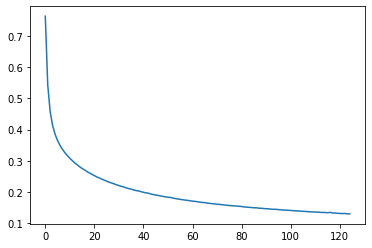

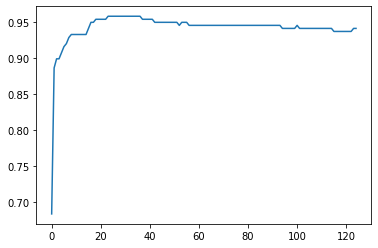

In [ ]:
for early_stopping in [True, False]:
  clf = get_mlp(early_stopping=early_stopping, validation_fraction=0.3)
  clf = clf.fit(X_train,y_train)

  training_acc=accuracy_score(y_train,clf.predict(X_train))
  test_acc=accuracy_score(y_val,clf.predict(X_val))

  print("Early_stopping: %s : Training acc: %.5f, Test acc: %.5f" %(early_stopping, training_acc, test_acc))

  if early_stopping:
    f = plt.figure(1)
    plt.plot(np.arange(len(clf.loss_curve_)), clf.loss_curve_, label='train')
    f.show()

    g = plt.figure(2)
    plt.plot(np.arange(len(clf.loss_curve_)), clf.validation_scores_, label='val')
    g.show()

#plt.show()

#### Explain the plot and any change in the train and test performance compared to the classifier trained without early stopping.

As training progresses, the classifier overfits to the training dataset, leading to lower loss on the training than on the validation dataset. For this problem, validation loss continues to increase as the model fits to the training dataset. 

By choosing the model with the lowest validation loss (i.e., the model after the first epoch), the model improves the test accuracy compared to the model chosen according to the lowest training loss. This latter model overfits to the training dataset, reducing it test accuracy.


